In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Set visualization style
plt.style.use('ggplot')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', parse_dates=['date'])

# Display basic info
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())
print("\nMissing values summary:")
display(df.isnull().sum().sort_values(ascending=False).head(15))

Dataset shape: (429435, 67)

First 5 rows:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN



Missing values summary:


weekly_icu_admissions_per_million          418442
weekly_icu_admissions                      418442
excess_mortality_cumulative_per_million    416024
excess_mortality                           416024
excess_mortality_cumulative                416024
excess_mortality_cumulative_absolute       416024
weekly_hosp_admissions_per_million         404938
weekly_hosp_admissions                     404938
icu_patients                               390319
icu_patients_per_million                   390319
hosp_patients_per_million                  388779
hosp_patients                              388779
total_boosters_per_hundred                 375835
total_boosters                             375835
new_vaccinations                           358464
dtype: int64

In [7]:
# Filter country-level data (exclude continents & income groups)
excluded_locations = [
    'World', 'Asia', 'Africa', 'Europe', 'North America', 'South America', 
    'Oceania', 'European Union', 'High income', 'Low income', 
    'Lower middle income', 'Upper middle income'
]
df = df[~df['location'].isin(excluded_locations)]

# Select relevant columns
columns_to_keep = [
    'date', 'location', 'iso_code', 'total_cases', 'new_cases',
    'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated',
    'people_fully_vaccinated', 'population', 'life_expectancy',
    'human_development_index'
]
df = df[columns_to_keep].copy()

# Forward-fill missing values within each country
df = df.groupby('location').apply(lambda x: x.ffill()).reset_index(drop=True)

# Calculate derived metrics
df['death_rate'] = df['total_deaths'] / df['total_cases']
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1e6
df['vaccination_rate'] = df['people_vaccinated'] / df['population']

# Display cleaned data
print("Cleaned data shape:", df.shape)
display(df.head())

Cleaned data shape: (417680, 16)


,date,location,iso_code,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,life_expectancy,human_development_index,death_rate,cases_per_million,vaccination_rate
0,2020-01-05,Afghanistan,AFG,0.0,0.0,0.0,0.0,NaN,NaN,NaN,41128772,64.83,0.511,NaN,0.0,NaN
1,2020-01-06,Afghanistan,AFG,0.0,0.0,0.0,0.0,NaN,NaN,NaN,41128772,64.83,0.511,NaN,0.0,NaN
2,2020-01-07,Afghanistan,AFG,0.0,0.0,0.0,0.0,NaN,NaN,NaN,41128772,64.83,0.511,NaN,0.0,NaN
3,2020-01-08,Afghanistan,AFG,0.0,0.0,0.0,0.0,NaN,NaN,NaN,41128772,64.83,0.511,NaN,0.0,NaN
4,2020-01-09,Afghanistan,AFG,0.0,0.0,0.0,0.0,NaN,NaN,NaN,41128772,64.83,0.511,NaN,0.0,NaN


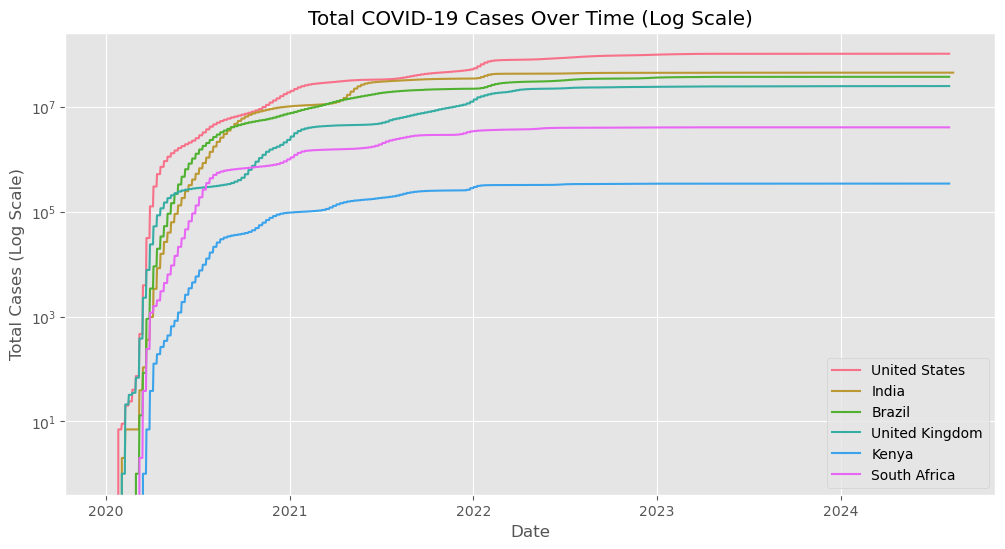

/tmp/ipykernel_234/1806991667.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['new_cases_7day_avg'] = country_data['new_cases'].rolling(7).mean()
/tmp/ipykernel_234/1806991667.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['new_cases_7day_avg'] = country_data['new_cases'].rolling(7).mean()
/tmp/ipykernel_234/1806991667.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

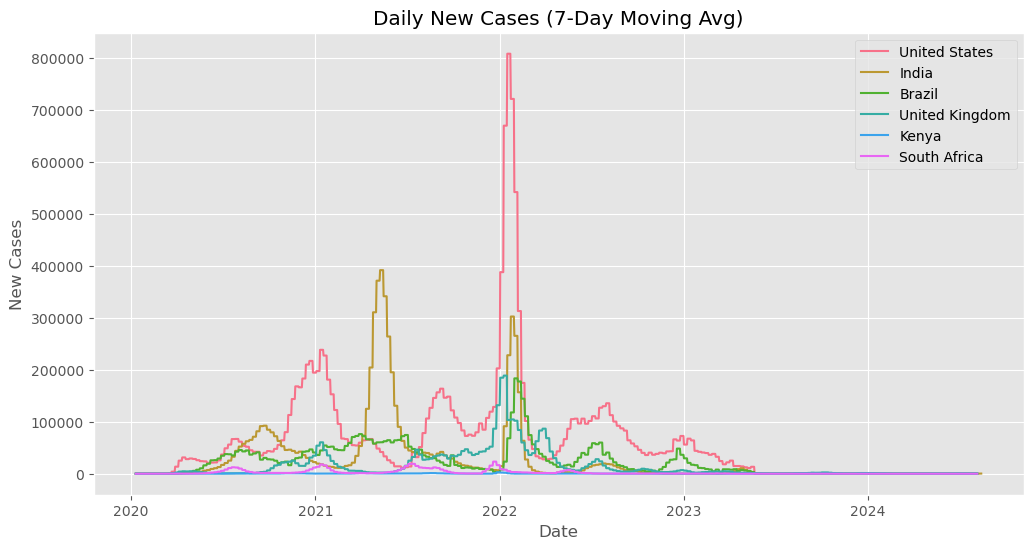

In [8]:
# Select key countries for analysis
key_countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Kenya', 'South Africa']
analysis_df = df[df['location'].isin(key_countries)]

# Plot total cases
plt.figure(figsize=(12, 6))
for country in key_countries:
    country_data = analysis_df[analysis_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Total Cases (Log Scale)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Plot new cases (7-day moving average)
plt.figure(figsize=(12, 6))
for country in key_countries:
    country_data = analysis_df[analysis_df['location'] == country]
    country_data['new_cases_7day_avg'] = country_data['new_cases'].rolling(7).mean()
    plt.plot(country_data['date'], country_data['new_cases_7day_avg'], label=country)

plt.title('Daily New Cases (7-Day Moving Avg)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

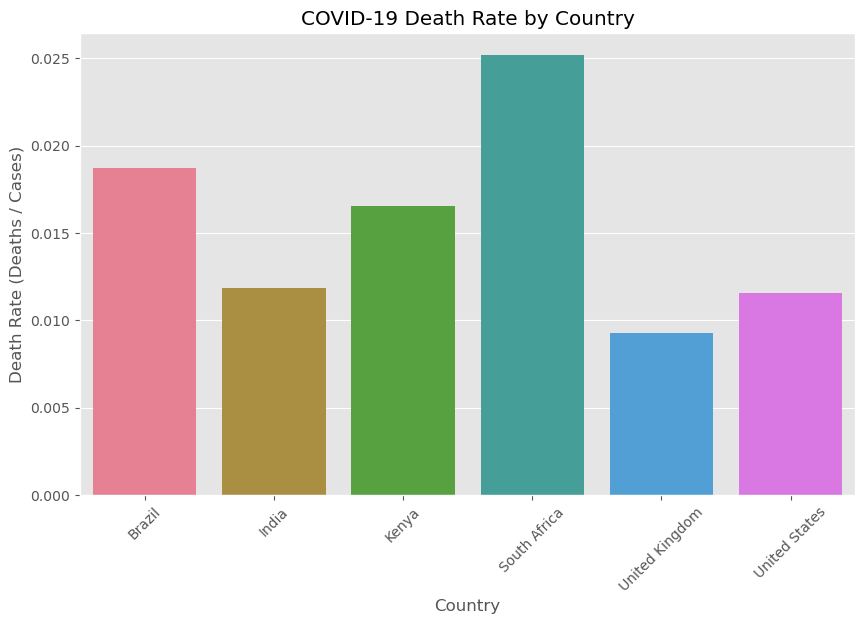

In [9]:
latest_data = analysis_df.groupby('location').last().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='death_rate', data=latest_data)
plt.title('COVID-19 Death Rate by Country')
plt.xlabel('Country')
plt.ylabel('Death Rate (Deaths / Cases)')
plt.xticks(rotation=45)
plt.show()

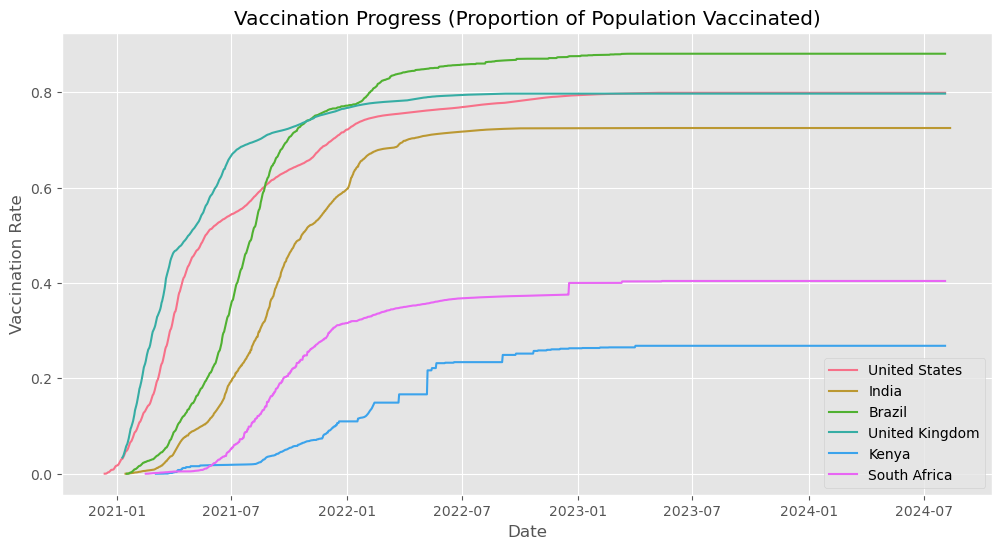

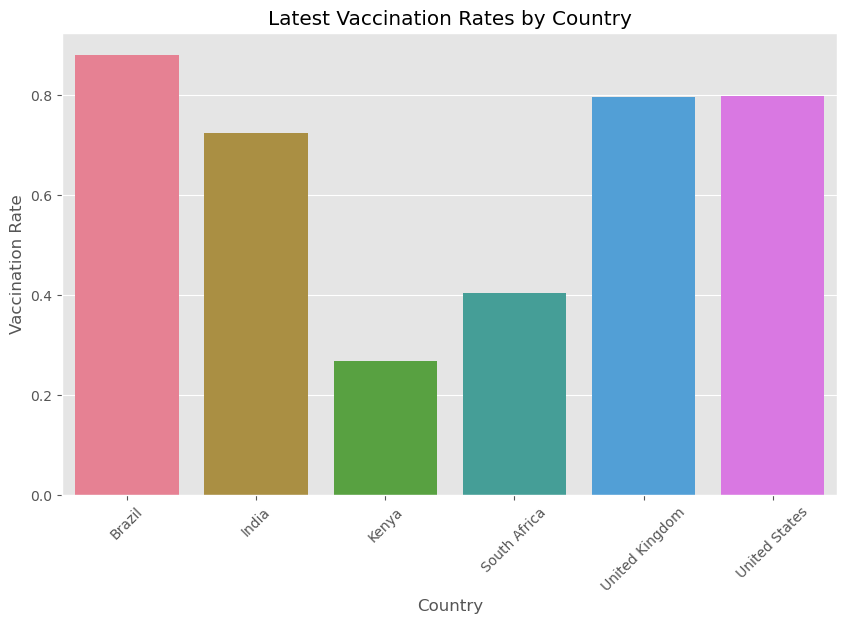

In [10]:
# Plot vaccination progress
plt.figure(figsize=(12, 6))
for country in key_countries:
    country_data = analysis_df[analysis_df['location'] == country]
    plt.plot(country_data['date'], country_data['vaccination_rate'], label=country)

plt.title('Vaccination Progress (Proportion of Population Vaccinated)')
plt.xlabel('Date')
plt.ylabel('Vaccination Rate')
plt.legend()
plt.grid(True)
plt.show()

# Latest vaccination rates
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='vaccination_rate', data=latest_data)
plt.title('Latest Vaccination Rates by Country')
plt.xlabel('Country')
plt.ylabel('Vaccination Rate')
plt.xticks(rotation=45)
plt.show()

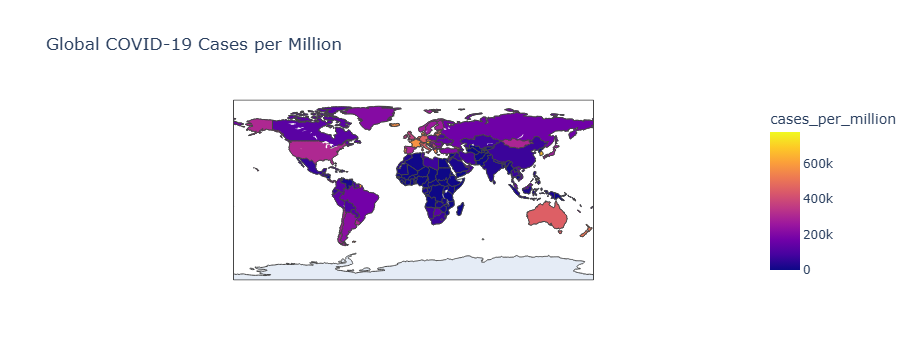

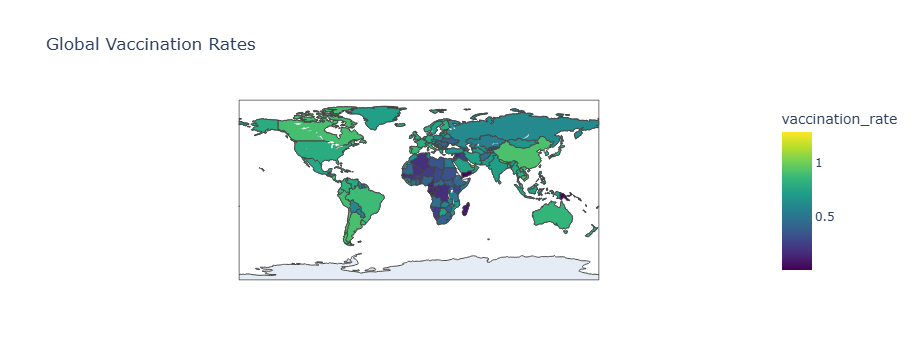

In [13]:
# Get latest global data
latest_global = df.groupby('location').last().reset_index()

# Cases per million (world map)
fig = px.choropleth(
    latest_global,
    locations="iso_code",
    color="cases_per_million",
    hover_name="location",
    title="Global COVID-19 Cases per Million",
    color_continuous_scale=px.colors.sequential.Plasma
)
fig.show()

# Vaccination rates (world map)
fig = px.choropleth(
    latest_global,
    locations="iso_code",
    color="vaccination_rate",
    hover_name="location",
    title="Global Vaccination Rates",
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.show()